In [1]:
from random import randint
from timeit import repeat

import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')

# Sorting

In [35]:
def get_random_array(n):
    return [randint(1, 100) for _ in range(n)]

In [136]:
def get_proc_time(algorithm, array, repeat=3):
    setup_code = f"from __main__ import {algorithm}" \
        if algorithm != "sorted" else ""

    stmt = f"{algorithm}({array})"

    times = repeat(setup=setup_code, stmt=stmt, repeat=repeat, number=10)
    return min(times), max(times)

In [59]:
class AbstractSort:
    def __init__(self):
        self._name = 'Abstract'
        self.history = []
        self.best_time = 999999999999
        self.best_time_array = 0

    def __str__(self):
        return f'''
        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        {self._name}
        Histories: {len(self.history)}
        Best time: {self.best_time}
        on length {self.best_time_array} array
        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        '''

    def save_history(self, arr_length, min_time, max_time, steps):
        if min_time < self.best_time and arr_length >= self.best_time_array:
            self.best_time = min_time
            self.best_time_array = arr_length

        self.history.append({
            'array_length': arr_length,
            'worst_case': max_time,
            'best_case': min_time,
            'steps': steps
        })

## Bubble Sorting

In [64]:
class BubbleSort(AbstractSort):
    def __init__(self):
        AbstractSort.__init__(self)
        self._name = 'Bubble Sort'
        
    def sort(self, arr):
        n = len(arr)
        effort = 0
        steps = []

        for i in range(n):
            already_sorted = True

            for j in range(n-i-1):
                if arr[j] > arr[j+1]:
                    arr[j], arr[j+1] = arr[j+1], arr[j]
                    already_sorted = False
                    effort += 1
                effort += 1
            
            effort += 1
            steps.append(effort)
            if already_sorted:
                break

        return arr, steps


In [77]:
bubble = BubbleSort()
bubble_sort = bubble.sort
for n in (1000, 500, 100):
    a = get_random_array(n)
    b = a.copy()

    sorted_array, steps = bubble.sort(a)
    min_t, max_t = get_proc_time('bubble_sort', b)
    bubble.save_history(n, min_t, max_t, steps)

print(bubble)


        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Bubble Sort
        Histories: 3
        Best time: 2.5399974769998153
        on length 1000 array
        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        


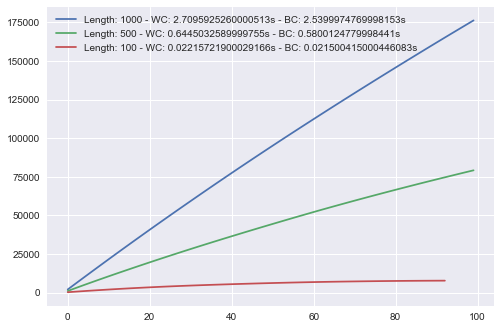

In [78]:
for h in bubble.history:
    label = f'Length: {h["array_length"]} - WC: {h["worst_case"]}s - BC: {h["best_case"]}s'
    plt.plot(h['steps'][:100], label=label)
plt.legend()

## Insertion Sort

In [82]:
class InsertionSort(AbstractSort):
    def __init__(self):
        AbstractSort.__init__(self)
        self._name = 'Insertion Sort'

    def sort(self, arr):
        n = len(arr)
        effort = 0
        steps = []

        for i in range(1, n):
            key = arr[i]
            j = i - 1
            
            while j >= 0 and arr[j] > key:
                arr[j+1] = arr[j]
                j -= 1
                effort += 1
            
            arr[j+1] = key
            effort += 1
            steps.append(effort)

        return arr, steps


In [83]:
insertion = InsertionSort()
insertion_sort = insertion.sort
for n in (1000, 500, 100):
    a = get_random_array(n)
    b = a.copy()

    sorted_array, steps = insertion.sort(a)
    min_t, max_t = get_proc_time('insertion_sort', b)
    insertion.save_history(n, min_t, max_t, steps)

print(insertion)


        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Insertion Sort
        Histories: 3
        Best time: 1.098164375000124
        on length 1000 array
        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        


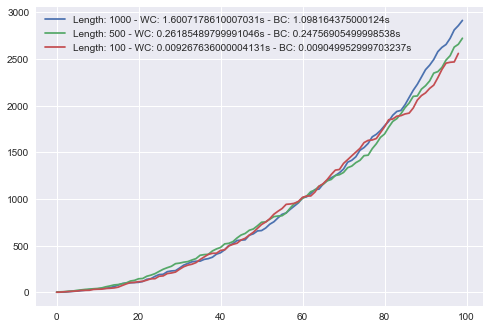

In [84]:
for h in insertion.history:
    label = f'Length: {h["array_length"]} - WC: {h["worst_case"]}s - BC: {h["best_case"]}s'
    plt.plot(h['steps'][:100], label=label)
plt.legend()

## Merge Sort

In [92]:
class MergeSort(AbstractSort):
    def __init__(self):
        AbstractSort.__init__(self)
        self._name = 'Merge Sort'
        self.effort = 0
        self.steps = []

    def reset_effort(self):
        self.effort = 0
        self.steps = []
        
    def merge(self, left, right):
        if len(left) == 0:
            return right

        if len(right) == 0:
            return left
        
        result = []
        index_left = index_right = 0

        while len(result) < len(left) + len(right):
            if left[index_left] <= right[index_right]:
                result.append(left[index_left])
                index_left += 1
            else:
                result.append(right[index_right])
                index_right += 1
            
            self.effort += 1
            self.steps.append(self.effort)
            
            if index_right == len(right):
                result += left[index_left:]
                break

            if index_left == len(left):
                result += right[index_right:]
                break

        return result

    def run(self, arr):
        if len(arr) < 2:
            return arr

        midpoint = len(arr) // 2

        return self.merge(
            left=self.run(arr[:midpoint]),
            right=self.run(arr[midpoint:])
        )

    def sort(self, arr):
        result = self.run(arr)
        steps = self.steps.copy()
        self.reset_effort()
        return result, steps

        

In [93]:
merge = MergeSort()
merge_sort = merge.sort
for n in (1000, 500, 100):
    a = get_random_array(n)
    b = a.copy()

    sorted_array, steps = merge.sort(a)
    min_t, max_t = get_proc_time('merge_sort', b)
    merge.save_history(n, min_t, max_t, steps)

print(merge)


        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Merge Sort
        Histories: 3
        Best time: 0.1286963860002288
        on length 1000 array
        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        


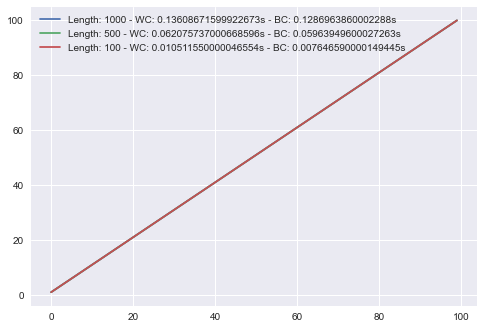

In [94]:
for h in merge.history:
    label = f'Length: {h["array_length"]} - WC: {h["worst_case"]}s - BC: {h["best_case"]}s'
    plt.plot(h['steps'][:100], label=label)
plt.legend()

## Quick Sort

In [97]:
class QuickSort(AbstractSort):
    def __init__(self):
        AbstractSort.__init__(self)
        self._name = 'Quick Sort'
        self.effort = 0
        self. steps = []

    def reset_effort(self):
        self.effort = 0
        self.steps = []    
        
    def quicksort(self, arr):
        if len(arr) < 2:
            return arr

        low, same, high = [], [], []
        pivot = arr[randint(0, len(arr)-1)]

        for item in arr:
            if item < pivot:
                low.append(item)
            elif item == pivot:
                same.append(item)
            elif item > pivot:
                high.append(item)
            self.effort += 1
            self.steps.append(self.effort)

        return self.quicksort(low) + same + self.quicksort(high)

    def sort(self, arr):
        result = self.quicksort(arr)
        steps = self.steps.copy()
        self.reset_effort()
        return result, steps
        

In [99]:
quick = QuickSort()
quick_sort = quick.sort
for n in (1000, 500, 100):
    a = get_random_array(n)
    b = a.copy()

    sorted_array, steps = quick.sort(a)
    min_t, max_t = get_proc_time('quick_sort', b)
    quick.save_history(n, min_t, max_t, steps)

print(quick)


        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Quick Sort
        Histories: 3
        Best time: 0.05099466100000427
        on length 1000 array
        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        


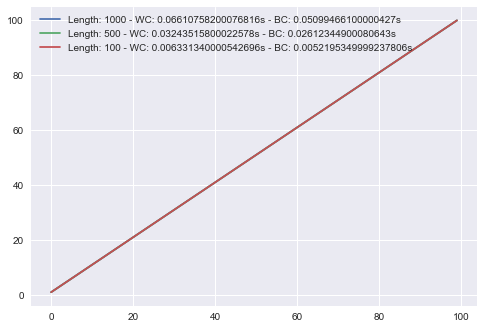

In [100]:
for h in quick.history:
    label = f'Length: {h["array_length"]} - WC: {h["worst_case"]}s - BC: {h["best_case"]}s'
    plt.plot(h['steps'][:100], label=label)
plt.legend()

## Timsort

In [126]:
class TimSort(MergeSort):
    def __init__(self):
        MergeSort.__init__(self)
        self._name = 'Tim Sort'

    def insertion_sort(self, arr, left=0, right=None):
        if right is None:
            right = len(arr) - 1

        for i in range(left+1, right+1):
            key = arr[i]
            j = i - 1
            
            while j >= left and arr[j] > key:
                arr[j+1] = arr[j]
                j -= 1
                self.effort += 1
            
            arr[j+1] = key
            self.effort += 1
            self.steps.append(self.effort)

        return arr

    def sort(self, arr):
        min_run= 32
        n = len(arr)

        for i in range(0, n, min_run):
            self.insertion_sort(arr, i, min((i+min_run-1), n-1))

        size = min_run
        while size < n:
            for start in range(0, n, size*2):
                midpoint = start + size - 1
                end = min((start+size*2-1), (n-1))
                
                merged_array = self.merge(
                    left=arr[start:midpoint+1],
                    right=arr[midpoint+1:end+1]
                )
                arr[start:start+len(merged_array)] = merged_array
        
            size *= 2
            self.effort += 1
    
        steps = self.steps.copy()
        self.reset_effort()
        return arr, steps
        

In [127]:
tim = TimSort()
tim_sort = tim.sort
for n in (1000, 500, 100):
    a = get_random_array(n)
    b = a.copy()

    sorted_array, steps = tim.sort(a)
    min_t, max_t = get_proc_time('tim_sort', b)
    tim.save_history(n, min_t, max_t, steps)

print(tim)


        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Tim Sort
        Histories: 3
        Best time: 0.11783277500035183
        on length 1000 array
        =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        


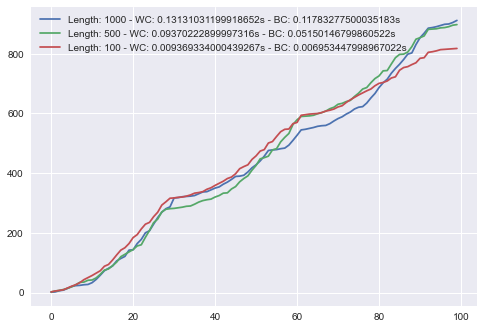

In [128]:
for h in tim.history:
    label = f'Length: {h["array_length"]} - WC: {h["worst_case"]}s - BC: {h["best_case"]}s'
    plt.plot(h['steps'][:100], label=label)
plt.legend()

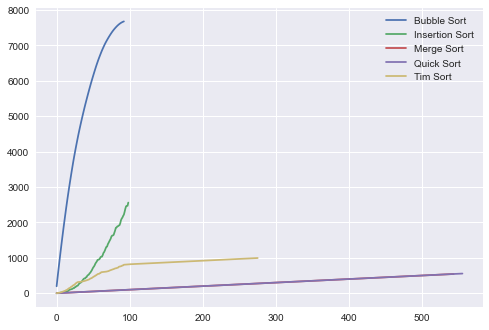

In [132]:
for algorithm in (bubble, insertion, merge, quick, tim):
    plt.plot(algorithm.history[-1]['steps'], label=algorithm._name)
plt.legend()

In [135]:
x = get_random_array(10000)
for algorithm in ('insertion_sort', 'merge_sort', 'quick_sort', 'tim_sort'):
    m, _ = get_proc_time(algorithm, x)
    print('Execution time for ', algorithm, ' : ', m)

Execution time for  insertion_sort  :  113.95984000899989
Execution time for  merge_sort  :  2.549431948998972
Execution time for  quick_sort  :  0.7409896880017186
Execution time for  tim_sort  :  2.8539746970018314


In [139]:
def get_proc_time(algorithm, array, count=3):
    setup_code = f"from __main__ import {algorithm}" \
        if algorithm != "sorted" else ""

    stmt = f"{algorithm}({array})"
    return repeat(setup=setup_code, stmt=stmt, repeat=count, number=10)

In [142]:
x = get_random_array(10000)
mrg_times = get_proc_time('merge_sort', x, 100)
qck_times = get_proc_time('quick_sort', x, 100)
tim_times = get_proc_time('tim_sort', x, 100)

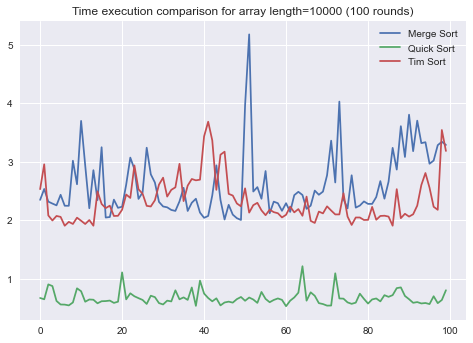

In [143]:
plt.plot(mrg_times, label='Merge Sort')
plt.plot(qck_times, label='Quick Sort')
plt.plot(tim_times, label='Tim Sort')
plt.title('Time execution comparison for array length=10000 (100 rounds)')
plt.legend()